# Magazine Subscription Campaign
## Logistic Regression Modelling
>### Author: Lu (Christina) Jin

# Setup: Import all libraries

In [1]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as pltimg
import scipy as scipy

import statsmodels.api as sm       
from statsmodels.formula.api import ols, logit
import datetime
from datetime import datetime, date

import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from math import sqrt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import statsmodels.api as smf
from statsmodels.formula.api import ols, logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [2]:
# Read data
marketing_df = pd.read_excel (r'C:\Users\Lu_ki\OneDrive - Northeastern University\NU Master Courseworks\Term 3_2021 Spring\ALY6020\Projects and Assignments\M3 - Logistic Regression Model\marketing_campaign.xlsx')

len(marketing_df)
marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Part 1: Data Cleansing, EDA and Data Manipulation 

In [3]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
marketing_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Interpration of the Attributes:
>
> **ID, Year_Birth, Education, Marital_Status and Income** are all pretty straight forward descriptive data about the condition of each customer.
>
> **Kidhome and Teenhome** tells us the number of young kids and teenagers in the household of each customer  
>
> **Dt_Customer:** I'm assuming is the date that customer first signed up / subscirbed / or made purchases with this firm.
>
> **Recency:** I'm assuming is the number of days since last subscription of magezine or purchase of product.
>
> **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds:** These are what got me a little confused, I thought this is a magezine marketing dataset, but now I'm asssuming that this dataset is not relevant to magezine, but products and produces, and these attributes above probably tells us the amount of money spent in each category of product.
>
> **NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth:** assuming these to be number of purchases for each category and the last one being the number of website visits during last month.
> 
> **AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5:** describe on which promotion did the customer accepted the offer of purchasing products.
>
> **Complain:** Whether the customer had complaints about their product or services purchased
>
> **Z_CostContact, Z_Revenue:** These two seems like archive input which are all the same for each single customer. They are irrelevant and do not constribute meaningful information for this dataset. Therefore, I'm going to drop these two columns later on.
>
> **Response:** assume this to be whether the customer wrote review or response to the products or services.

## Basic Data Cleansing

In [5]:
# drop irrelavent columns
marketing_df.drop(['ID', 'Z_CostContact','Z_Revenue'], axis = 1, inplace=True)
marketing_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [6]:
# check for null values
marketing_df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

>**We've observed 24 null inputs of the "income" column in the dataset, due to the total number of the dataset is only 2240, 24 is not a neglectable portion of the dataset, I've going to replace them with the median income instead of dropping them.**

In [7]:
marketing_df['Income'] = marketing_df['Income'].fillna(marketing_df['Income'].median())
marketing_df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

>**Next step, we are going to perform some exploratory analysis and seeking for further cleansing and processing.**

In [8]:
print(marketing_df['Education'].unique())
print(marketing_df['Marital_Status'].unique())
print(marketing_df['Dt_Customer'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '2013-03-28' '2012-11-03' '2012-08-08' '2013-01-06' '2012-12-23'
 '2014-01-11' '2013-03-18' '2013-01-02' '2013-05-27' '2013-02-20'
 '2013-05-31' '2013-11-22' '2014-05-22' '2013-05-11' '2012-10-29'
 '2013-08-29' '2013-12-31' '2013-09-02' '2014-02-11' '2013-02-01'
 '2013-04-29' '2013-03-12' '2013-11-05' '2013-10-02' '2014-06-28'
 '2012-11-09' '2013-05-24' '2014-01-01' '2012-11-08' '2014-05-12'
 '2012-08-11' '2014-06-07' '2013-06-12' '2012-11-19' '2013-04-02'
 '2014-04-28' '2013-06-17' '2014-03-03' '2013-07-04' '2012-09-07'
 '2013-02-18' '2013-06-11' '2013-12-06' '2013-05-21' '2014-05-11'
 '2014-03-19' '2013-09-27' '2013-04-08' '2012-09-11' '2012-09-14'
 '2013-03-17' '201

In [9]:
# clean the column of marital status
# Alone, Absurd and YOLO look like the same with Single, so replace with single
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

In [10]:
# convert Dt_Customer from object to datetime 
marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'])

## Outlier Detection and Removel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2240 non-null   float64
 2   MntWines             2240 non-null   int64  
 3   MntFruits            2240 non-null   int64  
 4   MntMeatProducts      2240 non-null   int64  
 5   MntFishProducts      2240 non-null   int64  
 6   MntSweetProducts     2240 non-null   int64  
 7   MntGoldProds         2240 non-null   int64  
 8   NumDealsPurchases    2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 227.6 KB


Year_Birth                AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Income                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
MntWines               AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
MntFruits              AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
MntMeatProducts        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
MntFishProducts        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
MntSweetProducts       AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
MntGoldProds                 AxesSubplot(0.125,0.125;0.0945122x0.343182)
NumDealsPurchases         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
NumWebPurchases           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
NumCatalogPurchases       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
NumStorePurchases         AxesSubplot(0.578659,0.125;0.0945122x0.343182)
NumWebVisitsMonth         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

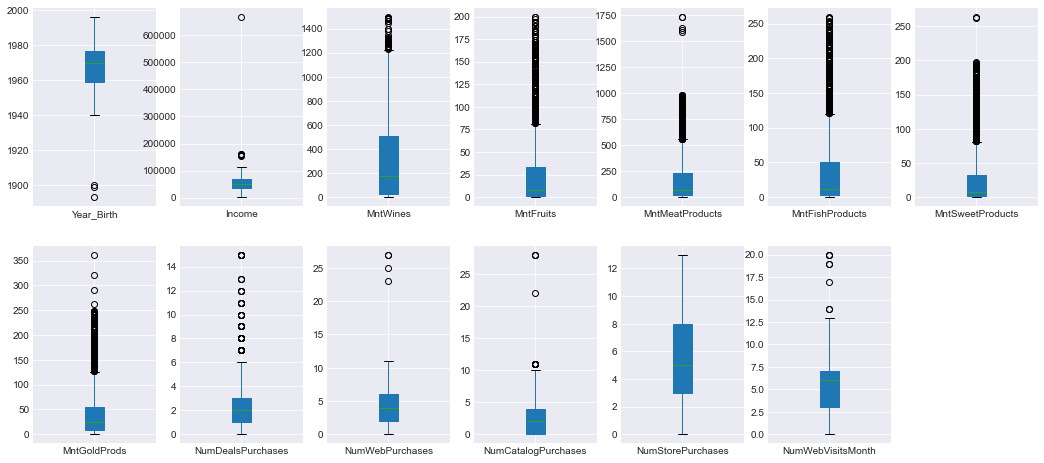

In [11]:
# select columns to explore
outlier_detect = marketing_df[marketing_df.columns.drop(list(marketing_df.filter(regex='Accepted')))]
outlier_detect = outlier_detect.drop(columns=['Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','Recency','Complain','Response'])
outlier_detect.info()

# plot box plots
outlier_detect.plot(subplots=True, layout=(2,7), kind='box', figsize=(18,8), patch_artist=True)

>**We observed that there are some obvious outliers for three columns: Year_Birth, Income, and MntMeatProducts. All other are not as skewed. Thus, we are only going apply outlier removal treatment to these three columns.**

In [12]:
df_filtered = marketing_df[marketing_df['Year_Birth'] > 1900]
df_filtered2 = df_filtered[df_filtered['Income'] < 500000]
marketing_df = df_filtered2[df_filtered2['MntMeatProducts'] < 1500]

marketing_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,...,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,1968.878082,51831.924922,0.444644,0.507396,49.124608,304.760197,26.325415,163.654863,37.605558,27.136262,...,2.621694,5.807710,5.329897,0.073061,0.074406,0.072613,0.064545,0.013447,0.008965,0.149709
std,11.707972,21050.377766,0.538605,0.544696,28.954513,336.701677,39.753747,214.673604,54.689228,41.328915,...,2.744478,3.244624,2.418278,0.260296,0.262489,0.259559,0.245776,0.115204,0.094277,0.356866
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35482.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68145.000000,1.000000,1.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.500000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,263.000000,...,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Year_Birth            AxesSubplot(0.125,0.125;0.227941x0.755)
Income             AxesSubplot(0.398529,0.125;0.227941x0.755)
MntMeatProducts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

<Figure size 1728x864 with 0 Axes>

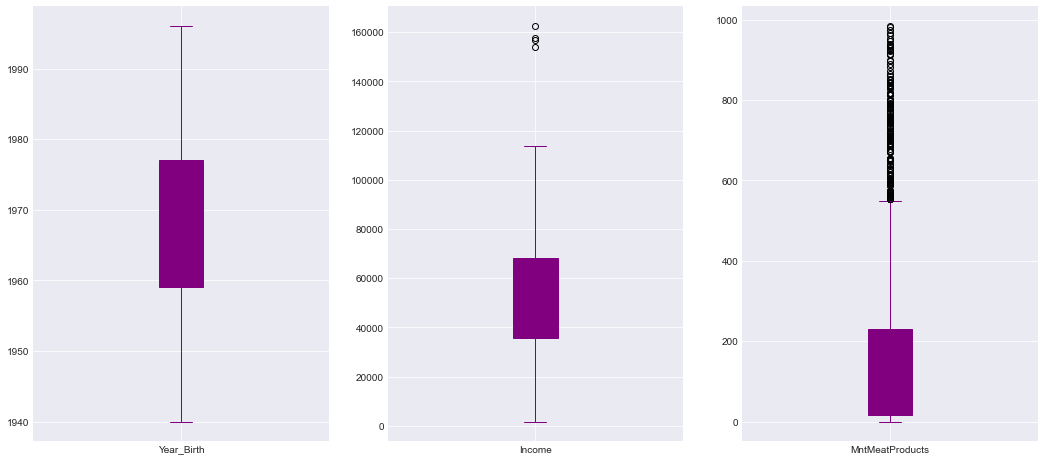

In [13]:
# confirm cleansed outliers with box plots again
outlier_clean = marketing_df[['Year_Birth','Income','MntMeatProducts']]

plt.figure(figsize=(24,12))
outlier_clean.plot(subplots=True, layout=(1,3), kind='box', figsize=(18,8), patch_artist=True, color = 'purple')

>**They look much better now without significant extreme outliers, so mext we are going to explore the data more see if we could perform any engineering towards any of the features.**

## Further Data Processing and Engineering

### 1. Customer Ages

In [14]:
# create new attribute of Customer ages, this coul dbe derived from year birth
marketing_df['Age'] = 2021 - marketing_df['Year_Birth']

# drop the year_birth column since it's no longer needed
marketing_df = marketing_df.drop(columns=['Year_Birth'])

<ipython-input-14-5b19a5722fbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df['Age'] = 2021 - marketing_df['Year_Birth']


### 2. Number of Dependents

In [15]:
# create new attribute of the total number of dependents in each household, this is the sum of kids and teens
marketing_df['Dependents'] = marketing_df['Kidhome'] + marketing_df['Teenhome']

# drop the other two columns since they are no longer needed
marketing_df = marketing_df.drop(columns=['Kidhome','Teenhome'])

### 3. Duration of Being a Customer with the Company

In [16]:
# create a new columns which calculates the days being a customer until today.
for i in range(0, len(marketing_df)):
    marketing_df['Duration_Customer'] = datetime.today().date()-marketing_df['Dt_Customer'].dt.date    
    
# Covert the new column to numerical value
marketing_df['Duration_Customer'] = marketing_df['Duration_Customer'].apply(lambda x: int(x/np.timedelta64(1, 'D')))
marketing_df['Duration_Customer'].dtype

# Remove the old input
marketing_df = marketing_df.drop(columns=['Dt_Customer'])

### 4. Number of Campaign Accepted

In [17]:
# create new attribute of total number of accepted campaign, this is the sum of all past campaign attempts
marketing_df['n_AcceptedCmp'] = marketing_df['AcceptedCmp1'] + marketing_df['AcceptedCmp2'] + marketing_df['AcceptedCmp3'] + marketing_df['AcceptedCmp4'] + marketing_df['AcceptedCmp5']

# drop the old inputs
marketing_df = marketing_df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'])

### 5. Total Purchase Mount

In [18]:
# create new attribute of total amount of money each customer spent
marketing_df['MntTotal'] = marketing_df['MntWines'] + marketing_df['MntFruits'] + marketing_df['MntMeatProducts'] + marketing_df['MntFishProducts'] + marketing_df['MntSweetProducts'] + marketing_df['MntSweetProducts']

### 6. Dummy Variables for Categorical Attributes

In [19]:
# create dummy variables
marketing_df = pd.get_dummies(marketing_df)
marketing_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,1,0,0,0,0,0,1,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,1,0,0,0,0,0,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,1,0,0,0,1,0,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,0,0,0,1,0,0,0,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,1,0,0,1,0,0,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,1,0,0,0,0,1,0


In [20]:
marketing_df = marketing_df.rename(columns={'Education_2n Cycle': 'Education_2n_Cycle'})

# Part 2: Build Logistic Model

>**Since we want to know whether our campaign method works and what are some key factors that have an impact on it. Therefore, after reviewing the final cleansed and processed data, I've decided to build a model that predicts whether people will respond to our campain on the products base on these given attributes. And to explore what are some variables that have a significant impact on it. We will start by checking the correlation between the predictors and target, and check for possible multicollinearities.**

## Checking Correlation Between Each Predictor and the Target

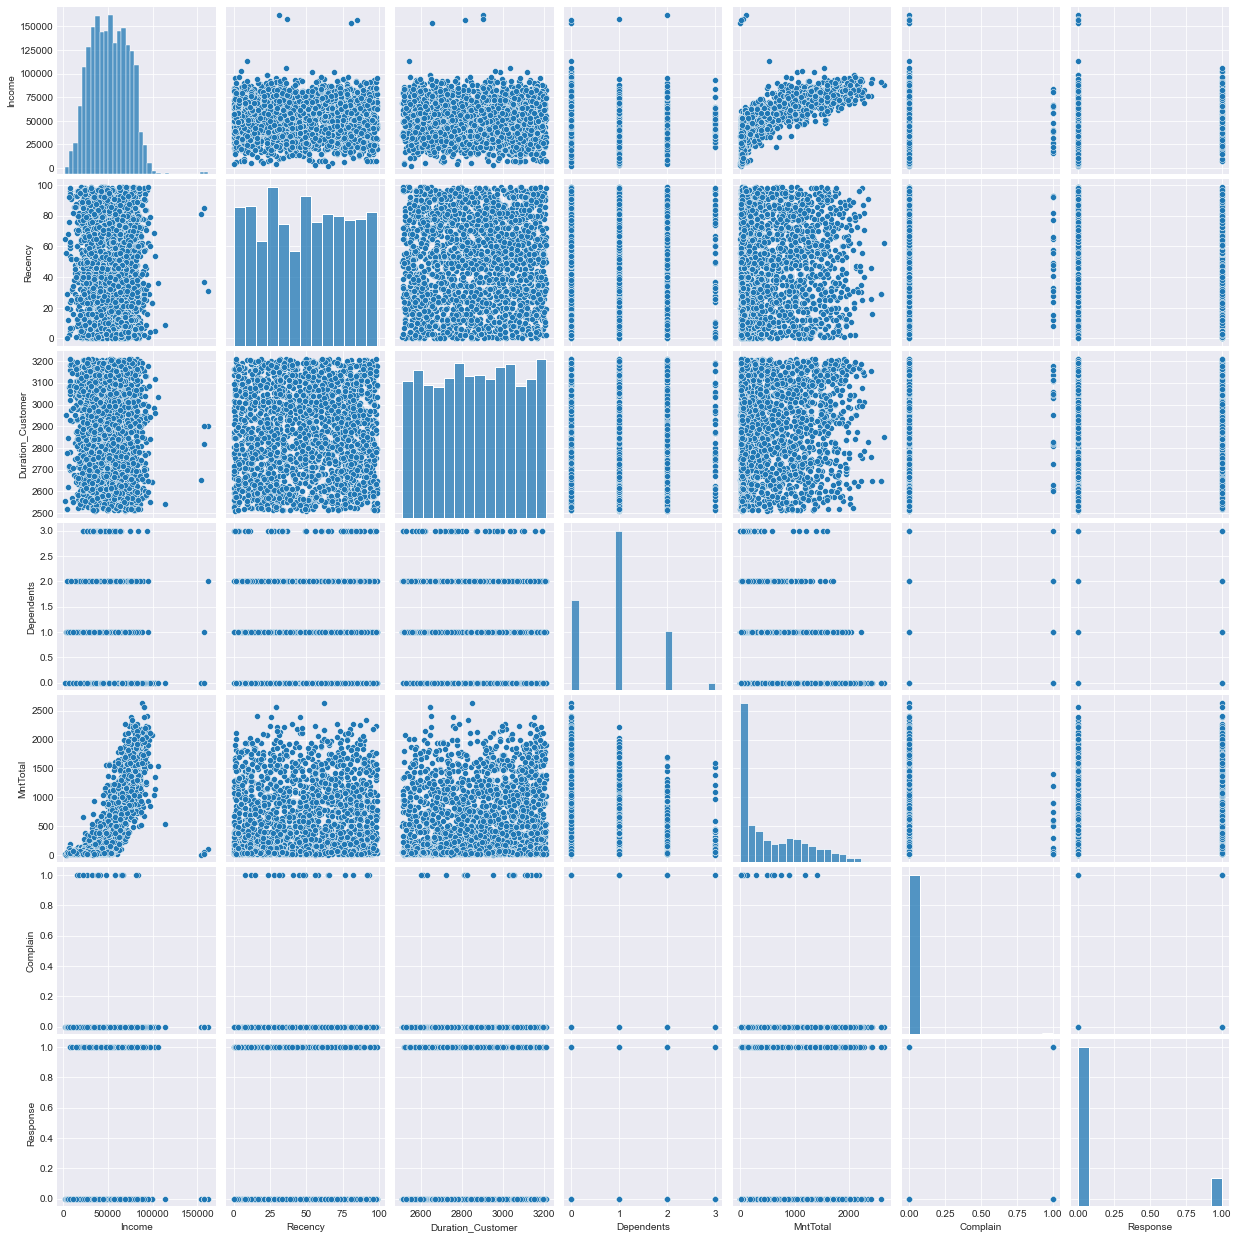

In [21]:
sns.pairplot(marketing_df, vars = ['Income', 'Recency', 'Duration_Customer', 'Dependents', 'MntTotal','Complain', 'Response'])

## Check for Multicollinearity using VIF

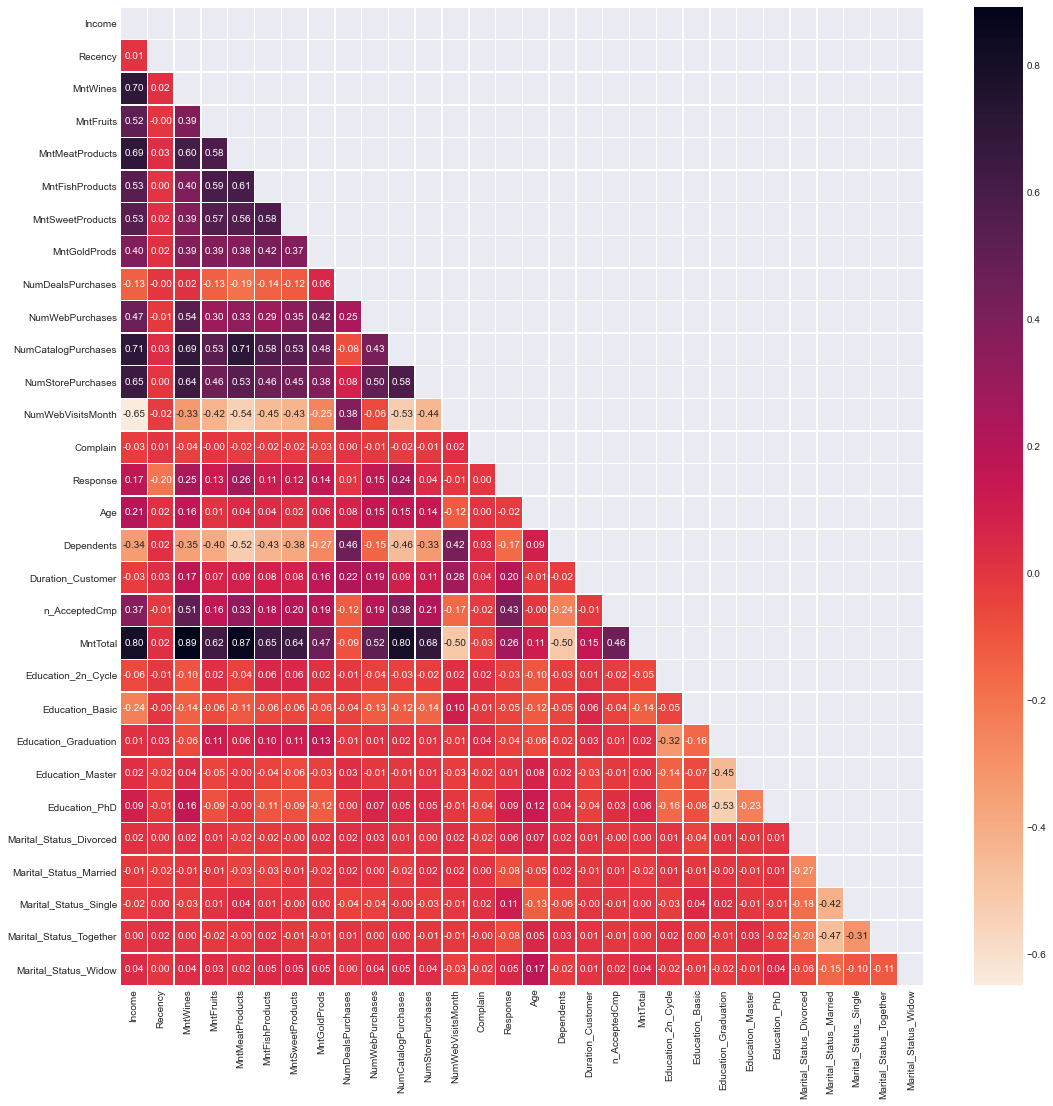

In [22]:
corr = marketing_df.corr()
fig, ax = plt.subplots(figsize=(18, 18))
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = 'rocket_r', linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

In [23]:
def calculate_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
  return(vif)

In [24]:
# set up independent variables and predict variables
y = marketing_df[['Response']]
x = marketing_df.drop(['Response'], axis = 'columns')
x

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_2n_Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,1,0,0,0,0,0,1,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,1,0,0,0,0,0,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,1,0,0,0,1,0,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,0,0,0,1,0,0,0,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,1,0,0,1,0,0,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# check for VIF for independent variables
calculate_vif(x)

C:\Users\Lu_ki\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Income,4.506464
1,Recency,1.010045
2,MntWines,inf
3,MntFruits,inf
4,MntMeatProducts,inf
5,MntFishProducts,inf
6,MntSweetProducts,inf
7,MntGoldProds,1.543386
8,NumDealsPurchases,1.740743
9,NumWebPurchases,1.952054


>**Since VIF > 10 indicates high multicollinearity, which is something we don't want. Thus, we are going to delete some of the variables that's showing "inf" (infinite) and see if that keeps the VIF score below 5.**

In [26]:
x = x.drop(['MntTotal'], axis = 1)
calculate_vif(x)

C:\Users\Lu_ki\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Income,4.506464
1,Recency,1.010045
2,MntWines,3.729921
3,MntFruits,1.970675
4,MntMeatProducts,3.018448
5,MntFishProducts,2.157856
6,MntSweetProducts,1.955871
7,MntGoldProds,1.543386
8,NumDealsPurchases,1.740743
9,NumWebPurchases,1.952054


>**Education and Marital status seems irrelevent to the response feature, so I'm going to excluded this features in the next step when building the model.**

## Fitting Logistic Regression Model

In [27]:
print(list(x))

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Dependents', 'Duration_Customer', 'n_AcceptedCmp', 'Education_2n_Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


In [28]:
# define logit function formula and fit model
features = "Response ~ Income + Recency + MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds + NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + Complain + Age + Dependents + Duration_Customer + n_AcceptedCmp"

logit_model = logit(features, data = marketing_df)
logit_estimates = logit_model.fit()
print(logit_estimates.summary())

Optimization terminated successfully.
         Current function value: 0.270384
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2231
Model:                          Logit   Df Residuals:                     2212
Method:                           MLE   Df Model:                           18
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.3596
Time:                        18:01:58   Log-Likelihood:                -603.23
converged:                       True   LL-Null:                       -941.94
Covariance Type:            nonrobust   LLR p-value:                3.500e-132
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -13.2859      1.399     -9.497      0.000     -16.028     -10.544
In

>**After reviewing the results of the model above, some of the predictors are not significant enough, since their P-value is larger than 0.05. Therefore, we are going to take those predictors off from the model to optimize it, which includes: Income, MntFruits, MntSweetProducts, MntGoldProducts, NumWebPuchases, Complain, and Age.** 

In [29]:
opt_features = "Response ~ Recency + MntWines + MntMeatProducts + MntFishProducts + NumDealsPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + Dependents + Duration_Customer + n_AcceptedCmp"

logit_model = logit(opt_features, data = marketing_df)
logit_estimates = logit_model.fit()
print(logit_estimates.summary())

Optimization terminated successfully.
         Current function value: 0.271365
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2231
Model:                          Logit   Df Residuals:                     2219
Method:                           MLE   Df Model:                           11
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.3573
Time:                        18:01:58   Log-Likelihood:                -605.42
converged:                       True   LL-Null:                       -941.94
Covariance Type:            nonrobust   LLR p-value:                3.235e-137
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -12.7790      1.260    -10.142      0.000     -15.249     -10.309
Re

In [30]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
#logi_model = LogisticRegression(solver='liblinear',random_state=0).fit(x_train,y_train)
#logi_model.score(x_test,y_test)

In [31]:
# update the independent variables and predict variables
y = marketing_df[['Response']]
x = marketing_df[['Recency','MntWines','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Dependents','Duration_Customer','n_AcceptedCmp']]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
logit_final = LogisticRegression(solver='liblinear',random_state=0).fit(x_train,y_train)
y_logit_pred = logit_final.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_logit_pred))

#logi_model.score(x_test,y_test)

Accuracy: 0.901565995525727


C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Now this model seems like a quite nicely fit one with an accuracy of 0.902, and according to this model, I have the following observations and conclusion.**

#### Some of the top significant variables are:

>Number of previously accepted campaigns
>
>Number of deal purchases
>
>Number of dependents **(negatively related)**
>
>Number of store purchases **(negatively related)**

#### Business impact of these variables and insights

>Among these four attributes, "Number of Accepted Campaigns" had the most influence on the chances of response from customers. An increase of 1 in the accepted campaigns will increase the log odds of response acceptance by 1.5822.
There is also a negtively correlated feature - number of dependents, an increase of 1 dependents in the customers' household will decrease the log odds of response acceptance by 0.4305.
>
>These findings from the model can help the business plan and target their campaign and promotion with the group of peope who have higher chances to respond to the campaign/promotion, which are people who have previously accepted to one or more of the campaigns, who had made many deal purchases previously, who are single, in a relationship or married with no kids, basically people with less or no dependents, and people who have less store purchased than other sort of purchases.

# Part 3: Build SVM Model

In [33]:
svm_model = svm.SVC(kernel='linear')
svm_final = svm_model.fit(x_train,y_train)
svm_model.coef_

C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[-1.36186420e-02, -3.06699461e-04,  1.44145216e-03,
        -1.84443870e-03,  6.94510832e-02,  5.31710254e-02,
        -9.65777865e-02,  2.60275630e-02, -1.98346015e-01,
         1.57549599e-03,  8.69211496e-01]])

In [34]:
y_svm_pred = svm_final.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_svm_pred))

Accuracy: 0.883668903803132


**Now this SVM model seems like a pretty nicely fit one with an accuracy of 0.884, and according to this model, I have the following observations and conclusion.**

#### Some of the top significant variables are:

>Number of previously accepted campaigns
>
>Number of dependents **(negatively related)**
>
>Number of store purchases **(negatively related)**

#### Business impact of these variables and insights

>Among these four attributes, "Number of Accepted Campaigns" had the most influence on the chances of response from customers. An increase of 1 in the accepted campaigns will increase the log odds of response acceptance by 0.87.
The second siginificant feature is negtively correlated - number of dependents, an increase of 1 dependents in the customers' household will decrease the log odds of response acceptance by 0.198.
>
>These findings from the model can help the business plan and target their campaign and promotion with the group of peope who have higher chances to respond to the campaign/promotion, which are people who have previously accepted to one or more of the campaigns, who are single, in a relationship or married with no kids, basically people with less or no dependents, and people who have less store purchased than other sort of purchases.

# Part 4. Model Comparision

Looking at both models, they are pretty similar in terms of the overall variables that were deemed significant. Although the coefficient varies a little, the accuracy of the model was quite close too, 0.902 and 0.884.

Since the top three significant metrics are the same, I would recommond the model with slightly higher accuracy score, 0.902, which is the logistic regression model.